In [1]:
%pylab inline
import math

Populating the interactive namespace from numpy and matplotlib


In [2]:
c=4.51**3/2
bm=-3/2*4.51-10
coeff=[1,bm,0,c]
print (r'the depth of upstream d_0 is: %s m'%round(roots(coeff)[0],2))

the depth of upstream d_0 is: 16.6 m


In [3]:
d=0.1
def B(x):
    return (x/100-3/2*4.51) #quadratic coefficient
x=arange(-1000,d,d)  #generate x
x=array(x)
X=[]
Y=[]
for i in range(len(x)):
    b=B(x[i])
    coeff = [1, b, 0, c] #define the cubic equation

    index=where((iscomplex(roots(coeff))==False)&(roots(coeff)>0)) # find the real positive root
    if(len(index[0])>0):
        X.append(x[i])
        Y.append(roots(coeff)[index][0])
X=array(X)
Y=array(Y)

In [4]:
def H(x):
    return x/100+10 #the hight of the obstacle
Y0=Y+H(X)

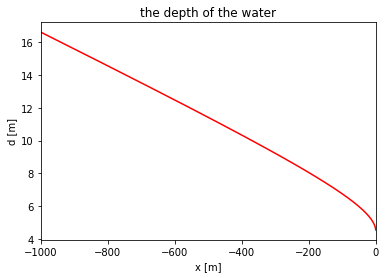

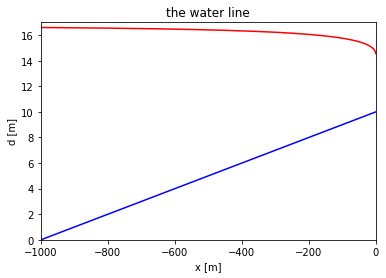

In [5]:
figure(1)
plot(X,Y,'r-')
title('the depth of the water')
xlabel('x [m]')
ylabel('d [m]')
xlim(-1000,0)

figure(2)
plot(X,Y0,'r-')
plot(X,H(X),'b-')
title('the water line')
xlabel('x [m]')
ylabel('d [m]')
ylim(0,17)
xlim(-1000,0)
show()

check if

$\lim\limits_{\delta x \to 0}(1-(\frac{d_m}{d(x)})^3)\frac{d(x+\delta x)-d(x)}{\delta x}=-\frac{1}{100}$


In [6]:
def f(x,y):
    return(1-(4.51/x)**3)*(y-x)/d
s=[]
for i in range(len(Y)):
    if i<=len(Y)-2:
        d=X[i+1]-X[i]
        s.append(f(Y[i],Y[i+1]))
    else:
        pass
s=array(s)
display(around(s,3)) 
print (len(where(around(s,3)==-0.01)[0])) #figure out how many d satisfies the momentum balance

array([-0.01 , -0.01 , -0.01 , ..., -0.011, -0.011, -0.012])

9995
